In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv("dataset/Covid Data.csv")
print("Shape of df :",df.shape)
df.head()

Shape of df : (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [54]:
df.isna().sum().sum()

0

In [55]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [56]:
df.DATE_DIED.value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [57]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [58]:
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

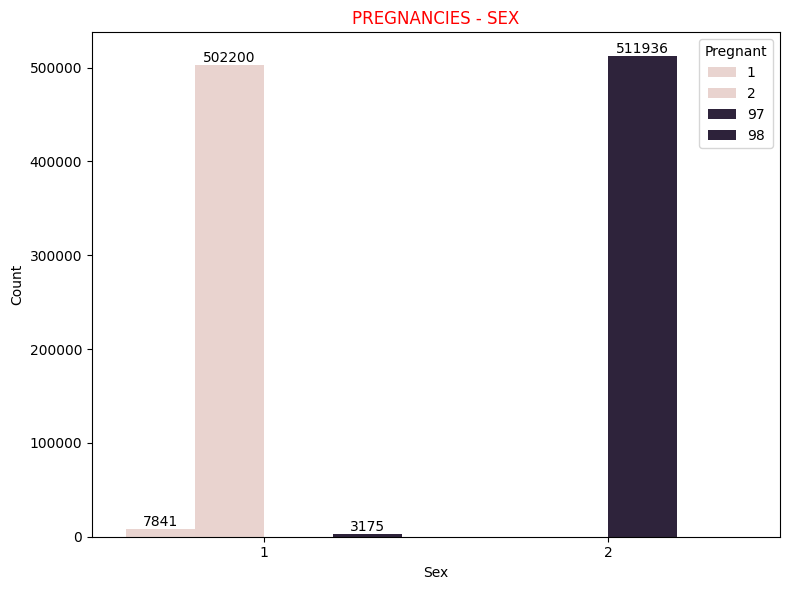

In [59]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SEX', hue='PREGNANT', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX", color="red")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Pregnant")
plt.tight_layout()
plt.show()

In [60]:
# Converting process according to inference above
df.PREGNANT = df.PREGNANT.replace(97,2)

# Getting rid of the missing values
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,2,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,2,1,...,2,1,2,2,2,2,2,3,97,1


In [61]:
unrelevant_columns = ["SEX","PREGNANT", "DATE_DIED", "COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,97,1,65,2,1,2,3,97,1
1,2,1,1,97,1,72,2,1,1,5,97,1
2,2,1,2,1,2,55,1,2,2,3,2,1
3,2,1,1,97,2,53,2,2,2,7,97,1
4,2,1,1,97,2,68,1,1,2,3,97,1


In [62]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))


USMER =>	 2
MEDICAL_UNIT =>	 13
PATIENT_TYPE =>	 2
INTUBED =>	 4
PNEUMONIA =>	 2
AGE =>	 121
DIABETES =>	 2
HIPERTENSION =>	 2
RENAL_CHRONIC =>	 2
CLASIFFICATION_FINAL =>	 7
ICU =>	 4
DEATH =>	 2


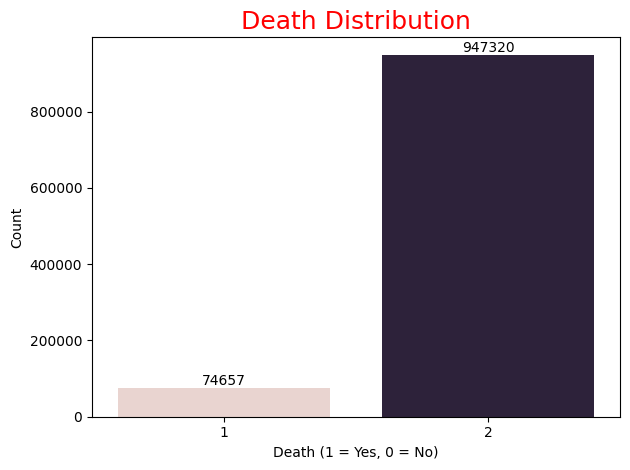

In [63]:
ax = sns.countplot(x='DEATH', data=df, palette=sns.cubehelix_palette(2))
for container in ax.containers:
    ax.bar_label(container)
plt.title("Death Distribution", fontsize=18, color="red")
plt.xlabel("Death (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [64]:
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

In [77]:
# Original DataFrame
print("Original df shape:", df.shape)

# Step 1: Extract 3 random unseen rows
unseen_data = df.sample(n=3, random_state=42)

# Step 2: Remove them from the original DataFrame
remaining_data = df.drop(unseen_data.index)

# Step 3: Show the shapes
print("Unseen data shape:", unseen_data.shape)
print("Remaining data shape:", remaining_data.shape)

remaining_data.head()

Original df shape: (1021977, 12)
Unseen data shape: (3, 12)
Remaining data shape: (1021974, 12)


,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,97,1,1.086957,2,1,2,3,97,1
1,2,1,1,97,1,1.391304,2,1,1,5,97,1
2,2,1,2,1,2,0.652174,1,2,2,3,2,1
3,2,1,1,97,2,0.565217,2,2,2,7,97,1
4,2,1,1,97,2,1.217391,1,1,2,3,97,1


In [74]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

In [67]:
rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)

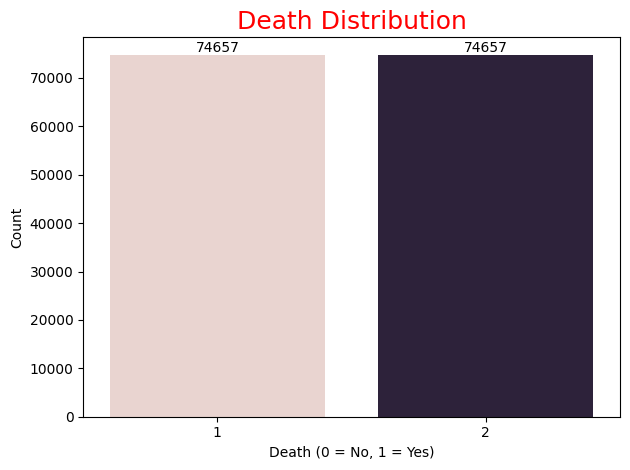

In [68]:
ax = sns.countplot(x=y_resampled, palette=sns.cubehelix_palette(2))
for container in ax.containers:
    ax.bar_label(container)

plt.title("Death Distribution", fontsize=18, color="red")
plt.xlabel("Death (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [69]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (119451, 11)
Test_x : (29863, 11)
Train_y : (119451,)
Test_y : (29863,)


In [70]:
# Train the model
logreg = LogisticRegression()
logreg.fit(train_x, train_y)

# Make predictions
y_pred = logreg.predict(test_x)

# Evaluation metrics
print("Logistic Regression Accuracy :", accuracy_score(test_y, y_pred))
print("Precision :", precision_score(test_y, y_pred))
print("Recall :", recall_score(test_y, y_pred))
print("F1 Score :", f1_score(test_y, y_pred))

Logistic Regression Accuracy : 0.9032582125037673
Precision : 0.891644908616188
Recall : 0.9174558398817919
F1 Score : 0.9043662484689993


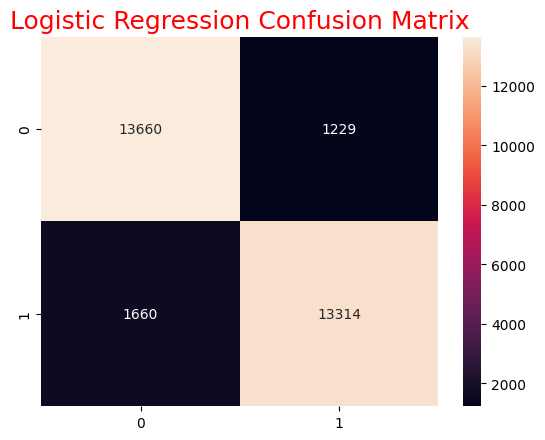

In [71]:
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

In [72]:
# Prepare unseen data for prediction
unseen_x = unseen_data.drop(columns="DEATH")
unseen_y = unseen_data["DEATH"]

# Make predictions
unseen_pred = logreg.predict(unseen_x)
unseen_proba = logreg.predict_proba(unseen_x)

# Get class order
class_order = logreg.classes_

# Compute confidence levels for predicted classes
confidence_levels = []
for proba, pred in zip(unseen_proba, unseen_pred):
    class_index = list(class_order).index(pred)
    confidence_levels.append(proba[class_index])

# Display predictions with confidence
print("Unseen Predictions with Confidence Levels:")
for i, (pred, confidence, actual) in enumerate(zip(unseen_pred, confidence_levels, unseen_y)):
    print(f"Sample {i+1}: Predicted = {pred}, Confidence = {confidence:.4f}, Actual = {actual}")


Unseen Predictions with Confidence Levels:
Sample 1: Predicted = 2, Confidence = 0.9834, Actual = 2
Sample 2: Predicted = 2, Confidence = 0.9551, Actual = 2
Sample 3: Predicted = 1, Confidence = 0.9761, Actual = 2


In [76]:
# Define the expected column names (excluding the target 'DEATH')
feature_cols = [
    'USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE',
    'DIABETES', 'HIPERTENSION', 'RENAL_CHRONIC', 'CLASIFFICATION_FINAL', 'ICU'
]

# Collect manual inputs
input_data = {}
print("Please enter the following values:")
for col in feature_cols:
    val = input(f"{col}: ")
    # Convert to float if it's AGE, otherwise int
    input_data[col] = float(val) if col == 'AGE' else int(val)

# Convert to DataFrame
unseen_x = pd.DataFrame([input_data])  # shape: (1, n_features)

# Make predictions
unseen_pred = logreg.predict(unseen_x)
unseen_proba = logreg.predict_proba(unseen_x)

# Get class order
class_order = logreg.classes_

# Compute confidence level
predicted_class = unseen_pred[0]
class_index = list(class_order).index(predicted_class)
confidence = unseen_proba[0][class_index]

# Display prediction
print("\nPrediction on Manual Input:")
print(f"Predicted: {predicted_class}, Confidence: {confidence:.4f}")

Please enter the following values:

Prediction on Manual Input:
Predicted: 1, Confidence: 0.8919
